In [2]:
import pandas as pd
import os
import re

pd.options.display.max_columns = None

In [3]:
fires = pd.DataFrame()
pathname = '../data'

for filename in os.listdir(pathname):
    if os.path.isfile(os.path.join(pathname, filename)) and 'Confirmed' in filename:
        if os.path.splitext(filename)[1] == '.csv':
            fires = pd.concat([fires, pd.read_csv(os.path.join(pathname, filename))], ignore_index=True)

fires = fires.drop('OBJECTID', axis=1).drop_duplicates()

In [4]:
def strip_time(entry):
    m = re.match('(\d{4}/\d{2}/\d{2})', entry)
    return m.group(1)

In [5]:
fires['confirmed_fire'] = True
fires['alarm_datetime'] = fires.apply(lambda row: strip_time(row.alm_date) + ' ' + row.alm_time, axis=1)
fires['clear_datetime'] = fires.apply(lambda row: strip_time(row.clr_date) + ' ' + row.clr_time, axis=1)
fires['alarm_datetime'] = pd.to_datetime(fires['alarm_datetime'])
fires['clear_datetime'] = pd.to_datetime(fires['clear_datetime'])

fires['alm_date'] = fires['alm_date'].apply(strip_time)
fires['clr_date'] = fires['clr_date'].apply(strip_time)

fires = fires.drop(['alm_time', 'clr_time', 'X', 'Y', 'LastUpdateDate', 'StartDate', 'EndDate'], axis=1)
fires = fires.sort_values('inci_no')



fires.head()

,FID,inci_no,descript,alm_date,station,number_,street,st_type,st_suffix,addr_2,apt_room,xst_prefix,xstreet,xst_type,xst_suffix,latitude,longitude,inci_type,clr_date,alarms,complete,number,confirmed_fire,alarm_datetime,clear_datetime
38236,NaN,0026882,Dumpster or other outside trash receptacle fir...,2016/08/02,21,NaN,38,ST,E,,,,,,,0.0,0.0,154,2016/08/02,1,1,2716,True,2016-08-02 05:44:50,2016-08-02 06:20:14
38237,NaN,0026886,Dumpster or other outside trash receptacle fir...,2016/08/02,06,NaN,Franklin,AVE,W,,,S,Hennepin,AVE,,0.0,0.0,154,2016/08/02,1,1,,True,2016-08-02 06:16:10,2016-08-02 06:33:03
38238,NaN,0027005,"Outside rubbish, trash or waste fire ...",2016/08/02,07,NaN,Elliot,AVE,S,,,,,,,0.0,0.0,151,2016/08/02,1,1,2100,True,2016-08-02 22:41:07,2016-08-02 22:56:13
38239,NaN,0027024,"Outside rubbish, trash or waste fire ...",2016/08/03,05,NaN,Cedar,AVE,S,,,E,Lake,ST,,0.0,0.0,151,2016/08/03,1,1,,True,2016-08-03 01:09:16,2016-08-03 01:19:09
38240,NaN,0027067,"Excessive heat, scorch burns with no ignition ...",2016/08/03,21,NaN,Lake,ST,E,,,,,,,0.0,0.0,251,2016/08/03,1,1,4222,True,2016-08-03 11:37:01,2016-08-03 14:39:18


In [6]:
years = sorted(fires['alarm_datetime'].dt.year.unique())
years

[2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]

In [7]:
col_names = fires.columns
col_names = col_names.drop('number_', 'number').insert(5, 'number')
fires = fires[col_names]

fires.head()

,FID,inci_no,descript,alm_date,station,number,street,st_type,st_suffix,addr_2,apt_room,xst_prefix,xstreet,xst_type,xst_suffix,latitude,longitude,inci_type,clr_date,alarms,complete,number,confirmed_fire,alarm_datetime,clear_datetime
38236,NaN,0026882,Dumpster or other outside trash receptacle fir...,2016/08/02,21,2716,38,ST,E,,,,,,,0.0,0.0,154,2016/08/02,1,1,2716,True,2016-08-02 05:44:50,2016-08-02 06:20:14
38237,NaN,0026886,Dumpster or other outside trash receptacle fir...,2016/08/02,06,,Franklin,AVE,W,,,S,Hennepin,AVE,,0.0,0.0,154,2016/08/02,1,1,,True,2016-08-02 06:16:10,2016-08-02 06:33:03
38238,NaN,0027005,"Outside rubbish, trash or waste fire ...",2016/08/02,07,2100,Elliot,AVE,S,,,,,,,0.0,0.0,151,2016/08/02,1,1,2100,True,2016-08-02 22:41:07,2016-08-02 22:56:13
38239,NaN,0027024,"Outside rubbish, trash or waste fire ...",2016/08/03,05,,Cedar,AVE,S,,,E,Lake,ST,,0.0,0.0,151,2016/08/03,1,1,,True,2016-08-03 01:09:16,2016-08-03 01:19:09
38240,NaN,0027067,"Excessive heat, scorch burns with no ignition ...",2016/08/03,21,4222,Lake,ST,E,,,,,,,0.0,0.0,251,2016/08/03,1,1,4222,True,2016-08-03 11:37:01,2016-08-03 14:39:18


In [8]:
df = fires.loc[fires.alarm_datetime.dt.year == 2021]

In [9]:
import matplotlib.pyplot as plt 
import numpy as np
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
import io
from urllib.request import urlopen, Request
from PIL import Image


# This code uses a spoofing algorithm to avoid bounceback from OSM servers
#

def image_spoof(self, tile): # this function pretends not to be a Python script
    url = self._image_url(tile) # get the url of the street map API
    req = Request(url) # start request
    req.add_header('User-agent','Anaconda 3') # add user agent to request
    fh = urlopen(req) 
    im_data = io.BytesIO(fh.read()) # get image
    fh.close() # close url
    img = Image.open(im_data) # open image with PIL
    img = img.convert(self.desired_tile_form) # set image format
    return img, self.tileextent(tile), 'lower' # reformat for cartopy

In [10]:
def plot_fire_map(year):
    df = fires.loc[fires.alarm_datetime.dt.year == year]


    max_lat, min_lat = df.latitude.max(), df.latitude.min()
    max_lon, min_lon = df.longitude.max(), df.longitude.min()


    cimgt.OSM.get_image = image_spoof # reformat web request for street map spoofing
    osm_img = cimgt.OSM() # spoofed, downloaded street map


    fig = plt.figure(figsize=(12,15)) # open matplotlib figure
    ax = fig.add_subplot(1,1,1, projection=osm_img.crs) # project using coordinate reference system (CRS) of street map
    ax.set_global()
    zoom = 0.075 # for zooming out of center point
    extent = [min_lon, max_lon, min_lat, max_lat]
    ax.set_extent(extent) # set extents

    scale = np.ceil(-np.sqrt(2)*np.log(np.divide(zoom,350.0))) # empirical solve for scale based on zoom
    scale = (scale<20) and scale or 19 # scale cannot be larger than 19
    ax.add_image(osm_img, int(scale), zorder=0) # add OSM with zoom specification
    # NOTE: zoom specifications should be selected based on extent:
    # -- 2     = coarse image, select for worldwide or continental scales
    # -- 4-6   = medium coarseness, select for countries and larger states
    # -- 6-10  = medium fineness, select for smaller states, regions, and cities
    # -- 10-12 = fine image, select for city boundaries and zip codes
    # -- 14+   = extremely fine image, select for roads, blocks, buildings

    ax.scatter(df.longitude, df.latitude, alpha= 0.5, c='r', s=50,
                transform=ccrs.PlateCarree()) # NEED transform=crs.PlateCarree()

    plt.title('Minneapolis Fire Calls', size=24)
    plt.show() # show the plot

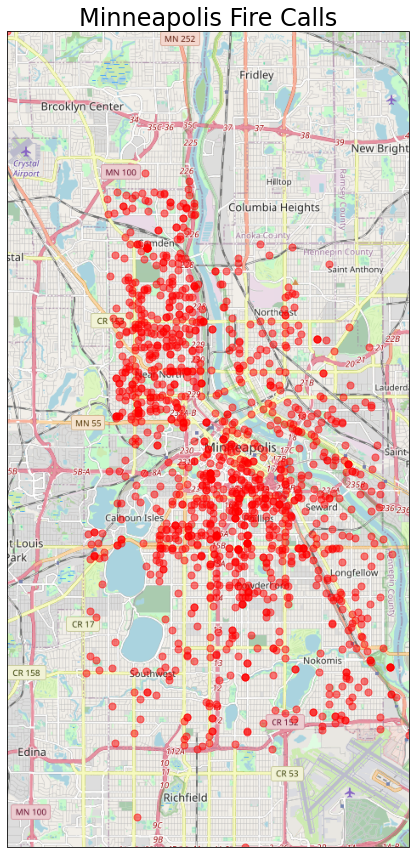

In [11]:
plot_fire_map(2017)

In [12]:
# Years with some incorrect locations: 2016, 2020
fires.loc[fires.longitude > -90]

,FID,inci_no,descript,alm_date,station,number,street,st_type,st_suffix,addr_2,apt_room,xst_prefix,xstreet,xst_type,xst_suffix,latitude,longitude,inci_type,clr_date,alarms,complete,number,confirmed_fire,alarm_datetime,clear_datetime
38236,NaN,0026882,Dumpster or other outside trash receptacle fir...,2016/08/02,21,2716,38,ST,E,,,,,,,0.0,0.0,154,2016/08/02,1,1,2716,True,2016-08-02 05:44:50,2016-08-02 06:20:14
38237,NaN,0026886,Dumpster or other outside trash receptacle fir...,2016/08/02,06,,Franklin,AVE,W,,,S,Hennepin,AVE,,0.0,0.0,154,2016/08/02,1,1,,True,2016-08-02 06:16:10,2016-08-02 06:33:03
38238,NaN,0027005,"Outside rubbish, trash or waste fire ...",2016/08/02,07,2100,Elliot,AVE,S,,,,,,,0.0,0.0,151,2016/08/02,1,1,2100,True,2016-08-02 22:41:07,2016-08-02 22:56:13
38239,NaN,0027024,"Outside rubbish, trash or waste fire ...",2016/08/03,05,,Cedar,AVE,S,,,E,Lake,ST,,0.0,0.0,151,2016/08/03,1,1,,True,2016-08-03 01:09:16,2016-08-03 01:19:09
38240,NaN,0027067,"Excessive heat, scorch burns with no ignition ...",2016/08/03,21,4222,Lake,ST,E,,,,,,,0.0,0.0,251,2016/08/03,1,1,4222,True,2016-08-03 11:37:01,2016-08-03 14:39:18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38296,NaN,0030463,Passenger vehicle fire ...,2016/08/28,16,1515,Washburn,AVE,N,,,,,,,0.0,0.0,131,2016/08/29,1,1,1515,True,2016-08-28 22:53:05,2016-08-29 00:42:15
38297,NaN,0030615,Passenger vehicle fire ...,2016/08/30,06,1300-130,Interstate 94 Wb,,,,,,,,,0.0,0.0,131,2016/08/30,1,1,1300-130,True,2016-08-30 01:08:49,2016-08-30 01:44:16
38298,NaN,0030851,"Outside rubbish, trash or waste fire ...",2016/08/31,05,3129,Oakland,AVE,,,,,,,,0.0,0.0,151,2016/08/31,1,1,3129,True,2016-08-31 20:10:30,2016-08-31 20:18:47
38299,NaN,0030887,Passenger vehicle fire ...,2016/09/01,06,,14,ST,W,,,,Willow,ST,,0.0,0.0,131,2016/09/01,1,1,,True,2016-09-01 06:24:02,2016-09-01 07:13:31
